In [1]:
import pandas as pd
import glob
import os

In [2]:
# Load summary file for all genbank files
file_path = '/results/combined_summary_TTA_among_bgc.csv'
TTA_among_bgc = pd.read_csv(file_path)

In [3]:
columns_to_keep = ['GCF_ID', 'Total_BGCs', 'BGCs_with_Rare_Codons',
       'Total_Genes', 'Genes_with_Rare_Codons', 'Percentage_TTA_BGCs',
       'Percentage_TTA_BGC_genes','Genus', 'Strain']

In [4]:
TTA_among_bgc = TTA_among_bgc[columns_to_keep]

In [5]:
TTA_among_bgc

,GCF_ID,Total_BGCs,BGCs_with_Rare_Codons,Total_Genes,Genes_with_Rare_Codons,Percentage_UUA_BGCs,Percentage_UUA_BGC_genes,Genus,Strain
0,GCF_003182415.1,33,22,1300,35,66.666667,2.692308,Actinokineospora,Actinokineospora spheciospongiae
1,GCF_003663795.1,33,29,1082,96,87.878788,8.872458,Actinokineospora,Actinokineospora cianjurensis
2,GCF_004362515.1,22,17,792,69,77.272727,8.712121,Actinokineospora,Actinokineospora alba
3,GCF_014648415.1,34,23,1163,52,67.647059,4.471195,Actinokineospora,Actinokineospora fastidiosa
4,GCF_016907695.1,38,30,1268,138,78.947368,10.883281,Actinokineospora,Actinokineospora baliensis
...,...,...,...,...,...,...,...,...,...
1931,GCF_040296245.1,13,3,406,3,23.076923,0.738916,Pseudonocardia,Pseudonocardia alni
1932,GCF_040653255.1,15,5,422,7,33.333333,1.658768,Pseudonocardia,Pseudonocardia alni
1933,GCF_042657685.1,10,1,215,1,10.000000,0.465116,Pseudonocardia,Pseudonocardia sulfidoxydans
1934,GCF_043197075.1,16,3,377,4,18.750000,1.061008,Pseudonocardia,Pseudonocardia alni


### Number of genes in genomes and TTA positive genes

In [6]:
# Load folder where summary files for each genera for TTA containing genes is located
input_folder = '/results/summary_files/TTA_summary'

# Collect all CSV files
csv_files = glob.glob(os.path.join(input_folder, "*.csv"))

# Read and concatenate
dfs = [pd.read_csv(f) for f in csv_files]
combined_df = pd.concat(dfs, ignore_index=True)

print(f"✅ Combined {len(csv_files)} CSV files into one dataframe with {combined_df.shape[0]} rows and {combined_df.shape[1]} columns.")

✅ Combined 11 CSV files into one dataframe with 1937 rows and 5 columns.


In [7]:
combined_df["GCF_ID"] = combined_df["GCF_ID"].str.replace(".gbk", "", regex=False)

In [8]:
merged_df = pd.merge(TTA_among_bgc, combined_df, on = 'GCF_ID')

In [9]:
merged_df = merged_df.rename(columns={
    "Total_Genes": "Total_Genes_BGC",
    "Total Genes": "Total_Genes_All",
    "Genes with TTA Codons": "TTA_Genes",
    "Genes_with_Rare_Codons": "TTA_BGC_Genes"
    
})


In [10]:
merged_df

,GCF_ID,Total_BGCs,BGCs_with_Rare_Codons,Total_Genes_BGC,UUA_BGC_Genes,Percentage_UUA_BGCs,Percentage_UUA_BGC_genes,Genus,Strain,Organism,Total_Genes_All,UUA_Genes,Percentage with UUA Codons
0,GCF_003182415.1,33,22,1300,35,66.666667,2.692308,Actinokineospora,Actinokineospora spheciospongiae,Actinokineospora spheciospongiae,6560,118,1.798780
1,GCF_003663795.1,33,29,1082,96,87.878788,8.872458,Actinokineospora,Actinokineospora cianjurensis,Actinokineospora cianjurensis,6606,548,8.295489
2,GCF_004362515.1,22,17,792,69,77.272727,8.712121,Actinokineospora,Actinokineospora alba,Actinokineospora alba,6575,460,6.996198
3,GCF_014648415.1,34,23,1163,52,67.647059,4.471195,Actinokineospora,Actinokineospora fastidiosa,Actinokineospora fastidiosa,6438,254,3.945325
4,GCF_016907695.1,38,30,1268,138,78.947368,10.883281,Actinokineospora,Actinokineospora baliensis,Actinokineospora baliensis,6698,612,9.137056
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1931,GCF_040296245.1,13,3,406,3,23.076923,0.738916,Pseudonocardia,Pseudonocardia alni,Pseudonocardia alni,5751,37,0.643366
1932,GCF_040653255.1,15,5,422,7,33.333333,1.658768,Pseudonocardia,Pseudonocardia alni,Pseudonocardia alni,5921,49,0.827563
1933,GCF_042657685.1,10,1,215,1,10.000000,0.465116,Pseudonocardia,Pseudonocardia sulfidoxydans,Pseudonocardia sulfidoxydans,7439,121,1.626563
1934,GCF_043197075.1,16,3,377,4,18.750000,1.061008,Pseudonocardia,Pseudonocardia alni,Pseudonocardia alni,5518,49,0.888003


In [11]:
from scipy.stats import hypergeom

def get_hypergeom_pval(row):
    N = row["Total_Genes_All"]
    K = row["Total_Genes_BGC"]
    n = row["TTA_Genes"]
    k = row["TTA_BGC_Genes"]
    return hypergeom.sf(k-1, N, K, n)

merged_df["Hypergeom_Pval"] = merged_df.apply(get_hypergeom_pval, axis=1)


In [12]:
# Add a boolean column for significance
merged_df["Significant"] = merged_df["Hypergeom_Pval"] < 0.05

# Group by Genus and compute percentage significant
genus_sig = (
    merged_df.groupby("Genus")["Significant"]
    .agg(["sum", "count"])
    .assign(Percentage=lambda x: 100 * x["sum"] / x["count"])
    .reset_index()
)

In [13]:
genus_sig

,Genus,sum,count,Percentage
0,Actinokineospora,5,11,45.454545
1,Amycolatopsis,18,60,30.000000
2,Kitasatospora,54,77,70.129870
3,Kribbella,16,57,28.070175
4,Micromonospora,33,184,17.934783
5,Nocardia,39,163,23.926380
6,Pseudonocardia,2,14,14.285714
7,Rhodococcus,43,186,23.118280
8,Saccharopolyspora,4,22,18.181818
9,Saccharothrix,10,15,66.666667


### Repeat same for AGA

In [14]:
# Load folder where summary files for each genera for AGA containing genes is located
file_path = '/results/combined_summary_AGA_among_bgc.csv'
AGA_among_bgc = pd.read_csv(file_path)

In [15]:
columns_to_keep = ['GCF_ID', 'Total_BGCs', 'BGCs_with_Rare_Codons',
       'Total_Genes', 'Genes_with_Rare_Codons', 'Percentage_AGA_BGCs',
       'Percentage_AGA_BGC_genes','Genus', 'Strain']

In [16]:
AGA_among_bgc = AGA_among_bgc[columns_to_keep]

In [17]:
AGA_among_bgc["GCF_ID"] = AGA_among_bgc["GCF_ID"].str.replace(".gbk", "", regex=False)

In [18]:
combined_df

,GCF_ID,Organism,Total Genes,Genes with UUA Codons,Percentage with UUA Codons
0,GCF_024171925.1,Actinokineospora diospyrosa,6890,784,11.378810
1,GCF_030268945.1,Actinokineospora globicatena,6566,720,10.965580
2,GCF_030268905.1,Actinokineospora globicatena,6650,707,10.631579
3,GCF_016907695.1,Actinokineospora baliensis,6698,612,9.137056
4,GCF_900111175.1,Actinokineospora terrae,6611,585,8.848888
...,...,...,...,...,...
1932,GCF_007828865.1,Kribbella amoyensis,7507,266,3.543360
1933,GCF_039529595.1,Kribbella lupini,7915,243,3.070120
1934,GCF_040254265.1,Kribbella sp. HUAS MG21,8041,257,3.196120
1935,GCF_040681455.1,Kribbella sp. NPDC051770,7779,232,2.982388


### Number of genes in genomes and AGA positive genes

In [19]:
# Input folder
input_folder = '/results/AGA_new_summary'

# Collect all CSV files
csv_files = glob.glob(os.path.join(input_folder, "*.csv"))

# Read and concatenate
dfs = [pd.read_csv(f) for f in csv_files]
combined_df_1 = pd.concat(dfs, ignore_index=True)

print(f"✅ Combined {len(csv_files)} CSV files into one dataframe with {combined_df.shape[0]} rows and {combined_df.shape[1]} columns.")

✅ Combined 11 CSV files into one dataframe with 1937 rows and 5 columns.


In [20]:
combined_df_1["GCF_ID"] = combined_df_1["GCF_ID"].str.replace(".gbk", "", regex=False)

In [21]:
combined_df_1.head()

,GCF_ID,Organism,Total Genes,Genes with AGA Codons,Percentage with AGA Codons
0,GCF_001294645.1,Pseudonocardia sp. HH130629-09,5951,557,9.359771
1,GCF_042657685.1,Pseudonocardia sulfidoxydans,7439,1190,15.996774
2,GCF_031082045.1,Pseudonocardia alni,6037,413,6.841146
3,GCF_021728735.1,Pseudonocardia sp. WMMC193,6932,848,12.233122
4,GCF_014267175.1,Pseudonocardia sp. C8,5756,358,6.219597


In [22]:
combined_df_1.to_excel("/results/combined_AGA_summary.xlsx")

In [23]:
AGA_among_bgc.to_excel("/results/AGA_summary_bgc.xlsx")

In [24]:
merged_df_1 = pd.merge(AGA_among_bgc, combined_df_1, on = 'GCF_ID')

In [25]:
merged_df_1 = merged_df_1.rename(columns={
    "Total_Genes": "Total_Genes_BGC",
    "Total Genes": "Total_Genes_All",
    "Genes with AGA Codons": "AGA_Genes",
    "Genes_with_Rare_Codons": "AGA_BGC_Genes"
    
})


In [26]:
merged_df_1

,GCF_ID,Total_BGCs,BGCs_with_Rare_Codons,Total_Genes_BGC,AGA_BGC_Genes,Percentage_AGA_BGCs,Percentage_AGA_BGC_genes,Genus,Strain,Organism,Total_Genes_All,AGA_Genes,Percentage with AGA Codons
0,GCF_001294645.1,18,16,608,75,88.888889,12.335526,Pseudonocardia,Pseudonocardia sp.,Pseudonocardia sp. HH130629-09,5951,557,9.359771
1,GCF_013408715.1,17,11,448,48,64.705882,10.714286,Pseudonocardia,Pseudonocardia antarctica,Pseudonocardia antarctica,5794,389,6.713842
2,GCF_014267175.1,16,13,379,27,81.250000,7.124011,Pseudonocardia,Pseudonocardia sp.,Pseudonocardia sp. C8,5756,358,6.219597
3,GCF_017305975.1,10,10,266,26,100.000000,9.774436,Pseudonocardia,Pseudonocardia sp.,Pseudonocardia sp.,6757,727,10.759213
4,GCF_017312155.1,15,10,391,32,66.666667,8.184143,Pseudonocardia,Pseudonocardia sp.,Pseudonocardia sp. UM4_GMWB1,5976,387,6.475904
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1931,GCF_024760565.1,40,37,1200,171,92.500000,14.250000,Actinokineospora,Actinokineospora sp.,Actinokineospora sp. UTMC 2448,6418,823,12.823309
1932,GCF_030268905.1,35,33,1034,218,94.285714,21.083172,Actinokineospora,Actinokineospora globicatena,Actinokineospora globicatena,6650,1202,18.075188
1933,GCF_030268945.1,32,31,1045,221,96.875000,21.148325,Actinokineospora,Actinokineospora globicatena,Actinokineospora globicatena,6566,1199,18.260737
1934,GCF_900101685.1,30,29,1167,273,96.666667,23.393316,Actinokineospora,Actinokineospora iranica,Actinokineospora iranica,6117,1273,20.810855


In [27]:
from scipy.stats import hypergeom

def get_hypergeom_pval(row):
    N = row["Total_Genes_All"]
    K = row["Total_Genes_BGC"]
    n = row["AGA_Genes"]
    k = row["AGA_BGC_Genes"]
    return hypergeom.sf(k-1, N, K, n)

merged_df_1["Hypergeom_Pval"] = merged_df_1.apply(get_hypergeom_pval, axis=1)


In [28]:
merged_df_1

,GCF_ID,Total_BGCs,BGCs_with_Rare_Codons,Total_Genes_BGC,AGA_BGC_Genes,Percentage_AGA_BGCs,Percentage_AGA_BGC_genes,Genus,Strain,Organism,Total_Genes_All,AGA_Genes,Percentage with AGA Codons,Hypergeom_Pval
0,GCF_001294645.1,18,16,608,75,88.888889,12.335526,Pseudonocardia,Pseudonocardia sp.,Pseudonocardia sp. HH130629-09,5951,557,9.359771,0.006095
1,GCF_013408715.1,17,11,448,48,64.705882,10.714286,Pseudonocardia,Pseudonocardia antarctica,Pseudonocardia antarctica,5794,389,6.713842,0.000644
2,GCF_014267175.1,16,13,379,27,81.250000,7.124011,Pseudonocardia,Pseudonocardia sp.,Pseudonocardia sp. C8,5756,358,6.219597,0.254441
3,GCF_017305975.1,10,10,266,26,100.000000,9.774436,Pseudonocardia,Pseudonocardia sp.,Pseudonocardia sp.,6757,727,10.759213,0.730668
4,GCF_017312155.1,15,10,391,32,66.666667,8.184143,Pseudonocardia,Pseudonocardia sp.,Pseudonocardia sp. UM4_GMWB1,5976,387,6.475904,0.097285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1931,GCF_024760565.1,40,37,1200,171,92.500000,14.250000,Actinokineospora,Actinokineospora sp.,Actinokineospora sp. UTMC 2448,6418,823,12.823309,0.056965
1932,GCF_030268905.1,35,33,1034,218,94.285714,21.083172,Actinokineospora,Actinokineospora globicatena,Actinokineospora globicatena,6650,1202,18.075188,0.003976
1933,GCF_030268945.1,32,31,1045,221,96.875000,21.148325,Actinokineospora,Actinokineospora globicatena,Actinokineospora globicatena,6566,1199,18.260737,0.005264
1934,GCF_900101685.1,30,29,1167,273,96.666667,23.393316,Actinokineospora,Actinokineospora iranica,Actinokineospora iranica,6117,1273,20.810855,0.009267


In [29]:
# Add a boolean column for significance
merged_df_1["Significant"] = merged_df_1["Hypergeom_Pval"] < 0.05

# Group by Genus and compute percentage significant
genus_sig_1 = (
    merged_df_1.groupby("Genus")["Significant"]
    .agg(["sum", "count"])
    .assign(Percentage=lambda x: 100 * x["sum"] / x["count"])
    .reset_index()
)


In [30]:
genus_sig_1

,Genus,sum,count,Percentage
0,Actinokineospora,9,11,81.818182
1,Amycolatopsis,30,60,50.000000
2,Kitasatospora,45,77,58.441558
3,Kribbella,52,57,91.228070
4,Micromonospora,64,184,34.782609
5,Nocardia,47,163,28.834356
6,Pseudonocardia,4,14,28.571429
7,Rhodococcus,28,186,15.053763
8,Saccharopolyspora,14,22,63.636364
9,Saccharothrix,7,15,46.666667


### Are those the same or different genomes? 

In [31]:
# Significant sets
sig_tta = set(merged_df.loc[merged_df["Hypergeom_Pval"] < 0.05, "GCF_ID"])
sig_aga = set(merged_df_1.loc[merged_df_1["Hypergeom_Pval"] < 0.05, "GCF_ID"])

# Overlap and differences
common = sig_tta & sig_aga
only_tta = sig_tta - sig_aga
only_aga = sig_aga - sig_tta

print("✅ Number of significant GCF_IDs (TTA):", len(sig_tta))
print("✅ Number of significant GCF_IDs (AGA):", len(sig_aga))
print("🔗 Common significant GCF_IDs:", len(common))
print("➡️ Significant only for TTA:", len(only_tta))
print("➡️ Significant only for AGA:", len(only_aga))


✅ Number of significant GCF_IDs (TTA): 1034
✅ Number of significant GCF_IDs (AGA): 951
🔗 Common significant GCF_IDs: 634
➡️ Significant only for TTA: 400
➡️ Significant only for AGA: 317


In [32]:
merged_df_1

,GCF_ID,Total_BGCs,BGCs_with_Rare_Codons,Total_Genes_BGC,AGA_BGC_Genes,Percentage_AGA_BGCs,Percentage_AGA_BGC_genes,Genus,Strain,Organism,Total_Genes_All,AGA_Genes,Percentage with AGA Codons,Hypergeom_Pval,Significant
0,GCF_001294645.1,18,16,608,75,88.888889,12.335526,Pseudonocardia,Pseudonocardia sp.,Pseudonocardia sp. HH130629-09,5951,557,9.359771,0.006095,True
1,GCF_013408715.1,17,11,448,48,64.705882,10.714286,Pseudonocardia,Pseudonocardia antarctica,Pseudonocardia antarctica,5794,389,6.713842,0.000644,True
2,GCF_014267175.1,16,13,379,27,81.250000,7.124011,Pseudonocardia,Pseudonocardia sp.,Pseudonocardia sp. C8,5756,358,6.219597,0.254441,False
3,GCF_017305975.1,10,10,266,26,100.000000,9.774436,Pseudonocardia,Pseudonocardia sp.,Pseudonocardia sp.,6757,727,10.759213,0.730668,False
4,GCF_017312155.1,15,10,391,32,66.666667,8.184143,Pseudonocardia,Pseudonocardia sp.,Pseudonocardia sp. UM4_GMWB1,5976,387,6.475904,0.097285,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1931,GCF_024760565.1,40,37,1200,171,92.500000,14.250000,Actinokineospora,Actinokineospora sp.,Actinokineospora sp. UTMC 2448,6418,823,12.823309,0.056965,False
1932,GCF_030268905.1,35,33,1034,218,94.285714,21.083172,Actinokineospora,Actinokineospora globicatena,Actinokineospora globicatena,6650,1202,18.075188,0.003976,True
1933,GCF_030268945.1,32,31,1045,221,96.875000,21.148325,Actinokineospora,Actinokineospora globicatena,Actinokineospora globicatena,6566,1199,18.260737,0.005264,True
1934,GCF_900101685.1,30,29,1167,273,96.666667,23.393316,Actinokineospora,Actinokineospora iranica,Actinokineospora iranica,6117,1273,20.810855,0.009267,True


In [33]:
import pandas as pd

# Mark significance in each df
merged_df["Significant_TTA"] = merged_df["Hypergeom_Pval"] < 0.05
merged_df_1["Significant_AGA"] = merged_df_1["Hypergeom_Pval"] < 0.05

# Select relevant columns
tta_df = merged_df[["GCF_ID", "Genus", "Strain", "Significant_TTA"]]
aga_df = merged_df_1[["GCF_ID", "Genus", "Strain", "Significant_AGA"]]

# Merge on GCF_ID, Genus, Strain
summary_df = pd.merge(
    tta_df, aga_df, on=["GCF_ID", "Genus", "Strain"], how="outer"
)

# Fill missing values with False (if a GCF_ID exists only in one df)
summary_df["Significant_TTA"] = summary_df["Significant_TTA"].fillna(False)
summary_df["Significant_AGA"] = summary_df["Significant_AGA"].fillna(False)

# Add category column
def classify(row):
    if row["Significant_TTA"] and row["Significant_AGA"]:
        return "Both"
    elif row["Significant_TTA"]:
        return "TTA only"
    elif row["Significant_AGA"]:
        return "AGA only"
    else:
        return "None"

summary_df["Category"] = summary_df.apply(classify, axis=1)

In [34]:
summary_df

,GCF_ID,Genus,Strain,Significant_TTA,Significant_AGA,Category
0,GCF_003182415.1,Actinokineospora,Actinokineospora spheciospongiae,True,False,TTA only
1,GCF_003663795.1,Actinokineospora,Actinokineospora cianjurensis,False,True,AGA only
2,GCF_004362515.1,Actinokineospora,Actinokineospora alba,True,True,Both
3,GCF_014648415.1,Actinokineospora,Actinokineospora fastidiosa,False,True,AGA only
4,GCF_016907695.1,Actinokineospora,Actinokineospora baliensis,True,True,Both
...,...,...,...,...,...,...
1931,GCF_040296245.1,Pseudonocardia,Pseudonocardia alni,False,False,None
1932,GCF_040653255.1,Pseudonocardia,Pseudonocardia alni,False,True,AGA only
1933,GCF_042657685.1,Pseudonocardia,Pseudonocardia sulfidoxydans,False,False,None
1934,GCF_043197075.1,Pseudonocardia,Pseudonocardia alni,False,False,None


In [35]:
summary_df.to_excel("/results/hypergeometric_test_bgc.xlsx", index = False) 

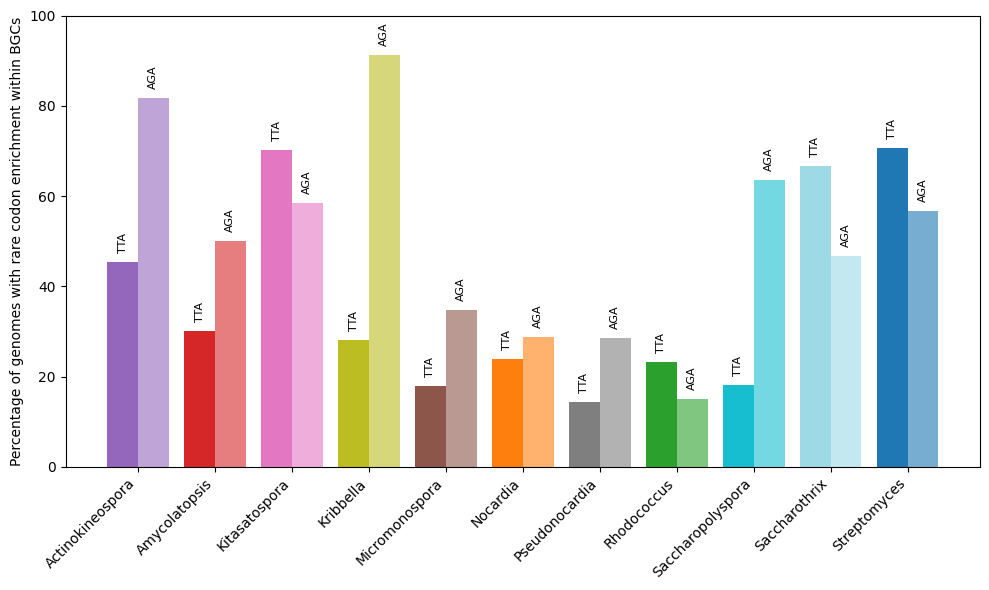

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# Your color codes
color_codes = {
    "Streptomyces": "#1f77b4",      # Blue 
    "Nocardia": "#ff7f0e",          # Orange 
    "Rhodococcus": "#2ca02c",       # Green 
    "Amycolatopsis": "#d62728",     # Red 
    "Actinokineospora": "#9467bd",  # Purple 
    "Micromonospora": "#8c564b",    # Brown 
    "Kitasatospora": "#e377c2",     # Pink 
    "Pseudonocardia": "#7f7f7f",    # Gray 
    "Kribbella": "#bcbd22",         # Olive 
    "Saccharopolyspora": "#17becf", # Cyan  
    "Saccharothrix": "#9edae5",     # Light Cyan  
    "Streptosporangium": "#f7b6d2"  # Light Pink
}

# Merge the two dataframes on Genus
combined = pd.merge(
    genus_sig[["Genus", "Percentage"]].rename(columns={"Percentage": "TTA"}),
    genus_sig_1[["Genus", "Percentage"]].rename(columns={"Percentage": "AGA"}),
    on="Genus", how="outer"
).fillna(0)

# Plot
fig, ax = plt.subplots(figsize=(10,6))

x = range(len(combined))
width = 0.4

# Plot TTA (left bar)
bars_tta = ax.bar(
    [i - width/2 for i in x], combined["TTA"], width,
    color=[color_codes[g] for g in combined["Genus"]]
)

# Plot AGA (right bar, semi-transparent)
bars_aga = ax.bar(
    [i + width/2 for i in x], combined["AGA"], width,
    color=[color_codes[g] for g in combined["Genus"]], alpha=0.6
)

# Annotate bars
for bar in bars_tta:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 2, "TTA",
            ha="center", va="bottom", fontsize=8, rotation=90)

for bar in bars_aga:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 2, "AGA",
            ha="center", va="bottom", fontsize=8, rotation=90)

# Formatting
ax.set_xticks(x)
ax.set_xticklabels(combined["Genus"], rotation=45, ha="right")
ax.set_ylabel("Percentage of genomes with rare codon enrichment within BGCs")
ax.set_ylim(0, 100)   # <-- force y-axis 0–100%

plt.tight_layout()
save_path = '/results/AGA_TTA_hypergeometric_BGCs.png'
plt.savefig(save_path, dpi=300)
plt.show()